In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits import mplot3d
import plotly.graph_objects as go

In [2]:
def check_first_in_pair(flag):
    return bin(flag)[-7] == '1'

# open sam summary and enzyme cut sites summary files
df = pd.read_csv('../../test/GCA_000007645.1_ASM764v1_genomic/summary_GCA_000007645.1_ASM764v1_genomic.tsv', sep='\t')
cut_sites = pd.read_csv('../../test/GCA_000007645.1_ASM764v1_genomic/GCA_000007645.1_ASM764v1_genomic.fna_summary.csv')

# Use sam flags to identify forward vs. reverse reads.  
df['forward'] = df['flag'].apply(lambda x: check_first_in_pair(x))

## EcoRI

```
   c r1
   . .
NNNNGAATTCNNNN
NNNNCTTAAGNNNN
   .    .
   c    r2
```

In [3]:
def check_in_cut_sites(cut_sites, df_for):
    site_dt = cut_sites.groupby('chr')['pos'].apply(list).to_dict()
    results = []
    np_for = np.array(df_for)
    
    for i in np_for:
        chr = i[2]
        try:
            results.append(i[9] in site_dt[chr])
        except KeyError:
            results.append(False)
        
    return results

In [4]:
# Keep only the forward reads (starging with EcoRI cut site).
df_for = df[df['forward'] == True]

# Create 'motif_pos' column to capture where EcoRI motif actually begins before cut is made.  
# (note: the position in the cut_sites dataframe are based on 0 indexing)

# Use the 'start' position for these:
top_strand = df_for[(df_for['length'] > 0)]
top_strand['motif_pos'] = top_strand['start'] - 2

# Use the 'end' position for these:
bot_strand = df_for[(df_for['length'] < 0)]
bot_strand['motif_pos'] = bot_strand['end'] - 5

df_for = pd.concat([top_strand, bot_strand])
df_for['motif_aligned'] = check_in_cut_sites(cut_sites[cut_sites['enzyme']==1], df_for)

                     query  flag         ref  start   end edit_dist  \
9       SRR10199716.437145    83  AE015929.1   3038  3171    NM:i:0   
10      SRR10199716.460625    83  AE015929.1   3038  3171    NM:i:0   
11      SRR10199716.261001    83  AE015929.1   3038  3171    NM:i:0   
12       SRR10199716.73837    83  AE015929.1   3038  3171    NM:i:1   
13      SRR10199716.649352    83  AE015929.1   3038  3171    NM:i:0   
...                    ...   ...         ...    ...   ...       ...   
101151  SRR10199716.295883    83  AE015935.1   5218  5351    NM:i:0   
101153  SRR10199716.651408    83  AE015935.1   6481  6614    NM:i:0   
101157  SRR10199716.454170    83  AE015935.1   6555  6688    NM:i:0   
101158  SRR10199716.450998    83  AE015935.1   6555  6688    NM:i:0   
101159  SRR10199716.242784    83  AE015935.1   6555  6688    NM:i:0   

        read_length  length  forward  
9               134     -37     True  
10              134     -37     True  
11              134     -36   

<ipython-input-4-b28b7dcb2e08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_strand['motif_pos'] = top_strand['start'] - 2
<ipython-input-4-b28b7dcb2e08>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_strand['motif_pos'] = bot_strand['end'] - 5


## MseI

```
   c r1
   . .
NNNNTTAANNNN
NNNNAATTNNNN
   .  .
   c  r2
```

In [9]:
# Keep only the reverse reads  (starging with MseI cut site).
df_rev = df[df['forward'] == False]

# Create 'motif_pos' column to capture where EcoRI motif actually begins before cut is made.  
# (note: the position in the cut_sites dataframe are based on 0 indexing)

# Use the 'start' position for these:
top_strand = df_rev[(df_rev['length'] > 0)]
top_strand['motif_pos'] = top_strand['start'] - 2

# Use the 'end' position for these:
bot_strand = df_rev[(df_rev['length'] < 0)]
bot_strand['motif_pos'] = bot_strand['end'] - 3

df_rev = pd.concat([top_strand, bot_strand])
df_rev['motif_aligned'] = check_in_cut_sites(cut_sites[cut_sites['enzyme']==2], df_rev)

                     query  flag         ref  start   end edit_dist  \
0       SRR10199716.437145   163  AE015929.1   3038  3175    NM:i:0   
1       SRR10199716.460625   163  AE015929.1   3038  3175    NM:i:0   
2        SRR10199716.73837   163  AE015929.1   3038  3175    NM:i:1   
3       SRR10199716.649352   163  AE015929.1   3038  3175    NM:i:0   
4       SRR10199716.355622   163  AE015929.1   3038  3175    NM:i:0   
...                    ...   ...         ...    ...   ...       ...   
101150  SRR10199716.295883   163  AE015935.1   5218  5355    NM:i:0   
101152  SRR10199716.651408   163  AE015935.1   6481  6618    NM:i:0   
101154  SRR10199716.454170   163  AE015935.1   6555  6692    NM:i:0   
101155  SRR10199716.450998   163  AE015935.1   6555  6692    NM:i:0   
101156  SRR10199716.242784   163  AE015935.1   6555  6692    NM:i:0   

        read_length  length  forward  
0               138      37    False  
1               138      37    False  
2               138      37   

<ipython-input-9-8daa55debb76>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_strand['motif_pos'] = top_strand['start'] - 2
<ipython-input-9-8daa55debb76>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_strand['motif_pos'] = bot_strand['end'] - 3


combine forward and reverse reads, keep only those matching canonical motif sites, reset index, keep only those with count == 2

In [16]:
df = pd.concat([df_for, df_rev])
df = df[df['motif_aligned'] == True]
df

,query,flag,ref,start,end,edit_dist,read_length,length,forward,motif_pos,motif_aligned
34,SRR10199716.363797,99,AE015929.1,3071,3204,NM:i:7,134,65,True,3069,True
35,SRR10199716.609317,99,AE015929.1,3071,3204,NM:i:0,134,32,True,3069,True
36,SRR10199716.287347,99,AE015929.1,3071,3204,NM:i:7,134,65,True,3069,True
37,SRR10199716.51540,99,AE015929.1,3071,3204,NM:i:7,134,65,True,3069,True
38,SRR10199716.544347,99,AE015929.1,3071,3204,NM:i:7,134,65,True,3069,True
...,...,...,...,...,...,...,...,...,...,...,...
99432,SRR10199716.392375,147,AE015934.1,14793,14930,NM:i:0,138,-243,False,14927,True
99433,SRR10199716.526932,147,AE015934.1,14793,14930,NM:i:5,138,-243,False,14927,True
99434,SRR10199716.398564,147,AE015934.1,14793,14930,NM:i:0,138,-243,False,14927,True
99435,SRR10199716.513830,147,AE015934.1,14793,14930,NM:i:9,138,-243,False,14927,True


In [17]:
df.reset_index(inplace=True, drop=True)
df['abs_length'] = df['length'].abs()
df = df[df['abs_length'] < 10000]
df['counts'] = df.groupby(['query'])['motif_aligned'].transform('count')
df = df[df['counts'] == 2]
df

<ipython-input-17-24ad9280c6fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['counts'] = df.groupby(['query'])['motif_aligned'].transform('count')


,query,flag,ref,start,end,edit_dist,read_length,length,forward,motif_pos,motif_aligned,abs_length,counts
171,SRR10199716.552102,99,AE015929.1,26753,26886,NM:i:0,134,252,True,26751,True,252,2
172,SRR10199716.596547,99,AE015929.1,26753,26886,NM:i:0,134,252,True,26751,True,252,2
173,SRR10199716.596575,99,AE015929.1,26753,26886,NM:i:0,134,252,True,26751,True,252,2
174,SRR10199716.117633,99,AE015929.1,26753,26886,NM:i:0,134,252,True,26751,True,252,2
175,SRR10199716.294479,99,AE015929.1,26753,26886,NM:i:0,134,252,True,26751,True,252,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53673,SRR10199716.392375,147,AE015934.1,14793,14930,NM:i:0,138,-243,False,14927,True,243,2
53674,SRR10199716.526932,147,AE015934.1,14793,14930,NM:i:5,138,-243,False,14927,True,243,2
53675,SRR10199716.398564,147,AE015934.1,14793,14930,NM:i:0,138,-243,False,14927,True,243,2
53676,SRR10199716.513830,147,AE015934.1,14793,14930,NM:i:9,138,-243,False,14927,True,243,2


separate forward and reverse once again, then merge forward and reverse into single dataframe

In [18]:
df.sort_values(by=['motif_pos'], ascending = (True), inplace=True)
df_for = df[df['forward'] == True]
df_rev = df[df['forward'] == False]
df = df_for.merge(df_rev, on='query', how='left')
df.reset_index(inplace=True, drop=True)

In [19]:
pd.set_option('display.max_columns', None)
df

,query,flag_x,ref_x,start_x,end_x,edit_dist_x,read_length_x,length_x,forward_x,motif_pos_x,motif_aligned_x,abs_length_x,counts_x,flag_y,ref_y,start_y,end_y,edit_dist_y,read_length_y,length_y,forward_y,motif_pos_y,motif_aligned_y,abs_length_y,counts_y
0,SRR10199716.181084,83,AE015931.1,4153,4286,NM:i:0,134,-253,True,4281,True,253,2,163,AE015931.1,4034,4171,NM:i:0,138,253,False,4032,True,253,2
1,SRR10199716.95380,83,AE015931.1,4153,4286,NM:i:0,134,-253,True,4281,True,253,2,163,AE015931.1,4034,4171,NM:i:0,138,253,False,4032,True,253,2
2,SRR10199716.529823,83,AE015931.1,4153,4286,NM:i:1,134,-253,True,4281,True,253,2,163,AE015931.1,4034,4171,NM:i:0,138,253,False,4032,True,253,2
3,SRR10199716.248093,83,AE015931.1,4153,4286,NM:i:0,134,-253,True,4281,True,253,2,163,AE015931.1,4034,4171,NM:i:0,138,253,False,4032,True,253,2
4,SRR10199716.206417,83,AE015931.1,4153,4286,NM:i:0,134,-253,True,4281,True,253,2,163,AE015931.1,4034,4171,NM:i:1,138,253,False,4032,True,253,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,SRR10199716.200976,83,AE015929.1,2498791,2498924,NM:i:3,134,-195,True,2498919,True,195,2,163,AE015929.1,2498730,2498867,NM:i:5,138,195,False,2498728,True,195,2
13802,SRR10199716.433461,83,AE015929.1,2498791,2498924,NM:i:1,134,-195,True,2498919,True,195,2,163,AE015929.1,2498730,2498867,NM:i:1,138,195,False,2498728,True,195,2
13803,SRR10199716.51585,83,AE015929.1,2498791,2498924,NM:i:0,134,-195,True,2498919,True,195,2,163,AE015929.1,2498730,2498867,NM:i:0,138,195,False,2498728,True,195,2
13804,SRR10199716.635643,83,AE015929.1,2498791,2498924,NM:i:1,134,-195,True,2498919,True,195,2,163,AE015929.1,2498730,2498867,NM:i:0,138,195,False,2498728,True,195,2


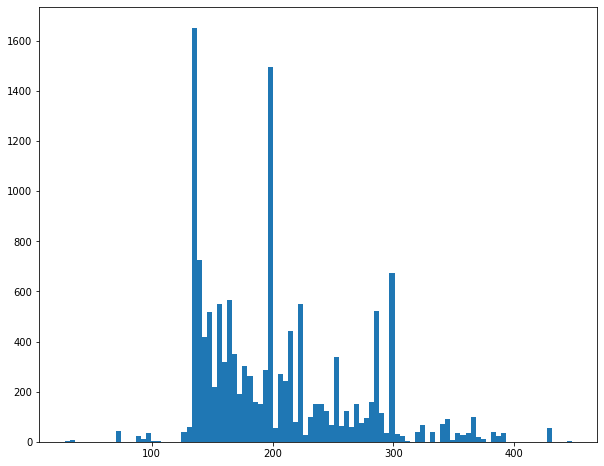

In [25]:
final_dt = df['abs_length_x'].value_counts().to_dict()

plt.figure(figsize=(10,8))
plt.hist(final_dt.keys(), weights=final_dt.values(), bins=100)
plt.show()

In [26]:
df = df[['query', 'abs_length_x', 'motif_pos_x', 'motif_pos_y', 'length_x']]
df

,query,abs_length_x,motif_pos_x,motif_pos_y,length_x
0,SRR10199716.181084,253,4281,4032,-253
1,SRR10199716.95380,253,4281,4032,-253
2,SRR10199716.529823,253,4281,4032,-253
3,SRR10199716.248093,253,4281,4032,-253
4,SRR10199716.206417,253,4281,4032,-253
...,...,...,...,...,...
13801,SRR10199716.200976,195,2498919,2498728,-195
13802,SRR10199716.433461,195,2498919,2498728,-195
13803,SRR10199716.51585,195,2498919,2498728,-195
13804,SRR10199716.635643,195,2498919,2498728,-195


In [ ]:
np_array = np.array(df)

loci_snip = {}

for i in range(np_array.shape[0]):
    if np_array[i,:][4] > 0:
        tmp_tup = (np_array[i,:][2], np_array[i,:][3])
    else:
        tmp_tup = (np_array[i,:][3], np_array[i,:][2])
    if tmp_tup in loci_snip:
        loci_snip[tmp_tup] += 1
    else:
        loci_snip[tmp_tup] = 1

In [ ]:
rez=10000

beginning = 1_000_000
ending = 1_050_000

for i in range(beginning, ending, rez):
    plt.figure(figsize=(20,1))
    plt.scatter([k[0] for k in loci_snip.keys()], loci_snip.values(), s=40, color='red')
    plt.scatter([k[1] for k in loci_snip.keys()], loci_snip.values(), s=40, color='red')
    for j in loci_snip.keys():
        if i < j[0] < i + rez:
            plt.axvline(x=j[0], alpha=0.13)
            plt.axvline(x=j[1], alpha=0.13)
    plt.axhline(y=1, alpha=0.13)
    plt.xlim([i,i+rez])
    plt.ylim([0,100])
    plt.show()

In [ ]:
all_cut_sites = []

for i in loci_snip.keys():
    if i[0] not in all_cut_sites:
        all_cut_sites.append(i[0])
    if i[1] not in all_cut_sites:
        all_cut_sites.append(i[1])

all_cut_sites.sort()

In [ ]:
mx_snip = []

for i, count in loci_snip.items():
    try:
        start = all_cut_sites.index(i[0])
        end = all_cut_sites.index(i[1])
        mx_snip.append([i[1]-i[0], end - start - 1, count])
        print([i[1]-i[0], end - start - 1, count])
    except ValueError:
        pass

mx_snip = np.array(mx_snip)

In [ ]:
x = mx_snip[:,0]
y = mx_snip[:,1]
z = mx_snip[:,2]

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='read length (BP)',
                    yaxis_title='internal cut sites',
                    zaxis_title='read count'),
                    width=700,
                    margin=dict(r=0, b=0, l=0, t=0))


fig.show()

In [ ]:
max_internals = np.max(mx_snip[:,1])
last_target, last_internals, last_count = (0, 0), 0, 0
ratios = []

for idx, i in enumerate(all_cut_sites):
    for j in range(max_internals+1):
        try:
            target = (all_cut_sites[idx], all_cut_sites[idx+j+1])
        except IndexError:
            break
        if target in loci_snip:
            if target[0] == last_target[0]:
                print(all_cut_sites[idx:idx+j+2])
                print(last_target)
                print(target)
                print(last_internals, j)
                if j - last_internals == 1:
                    ratios.append([last_count, loci_snip[target]])
            last_internals = j
            last_target = target
            last_count = loci_snip[target]

In [ ]:
ratios = pd.DataFrame(np.array(ratios), columns=['inner', 'outer'])
ratios['ratio'] = ratios['inner']/ratios['outer']

In [ ]:
print(ratios)

ratios['ratio'].mean()

In [ ]:
def get_prob(ratio):
    return (1-ratio)/-ratio

print(get_prob(ratios['ratio'].mean()))